In [1]:
from PIL import Image
from PIL import ImageShow  # For some environments, you may need to import ImageShow explicitly

# Load an image from file
image_path = "C:\\Users\\DELL\\Downloads\\a.png" # Replace with the path to your image file
img = Image.open(image_path)

# Display the image
img.show
ImageShow.show(img)


 

True

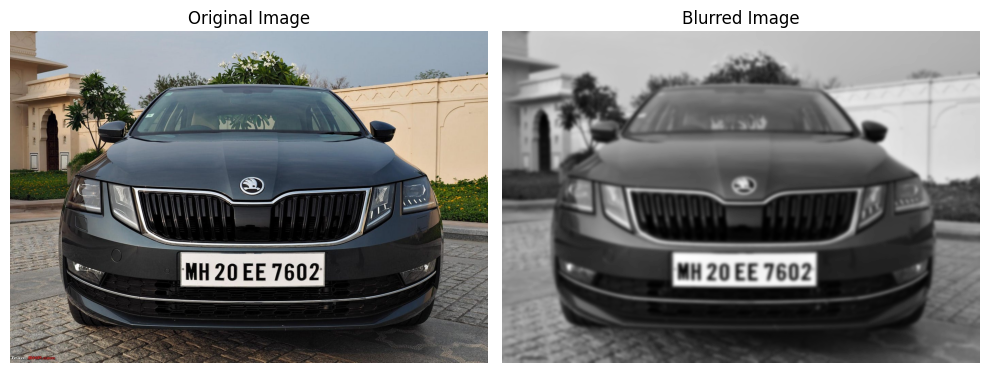

In [15]:
import cv2
from matplotlib import pyplot as plt

# Load the image
image_path = "C:\\Users\\DELL\\Downloads\\d.jpg"  # Replace with the path to your image file
image = cv2.imread(image_path)

# Check if image loading is successful
if image is None:
    print(f"Error: Unable to load image '{image_path}'.")
else:
    # Convert the image to grayscale (if needed)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(gray_image, (25, 25), 0)  # Adjust kernel size (15, 15) as needed

    # Display original and blurred images using matplotlib
    plt.figure(figsize=(10, 6))

    plt.subplot(121)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(122)
    plt.title('Blurred Image')
    plt.imshow(blurred_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

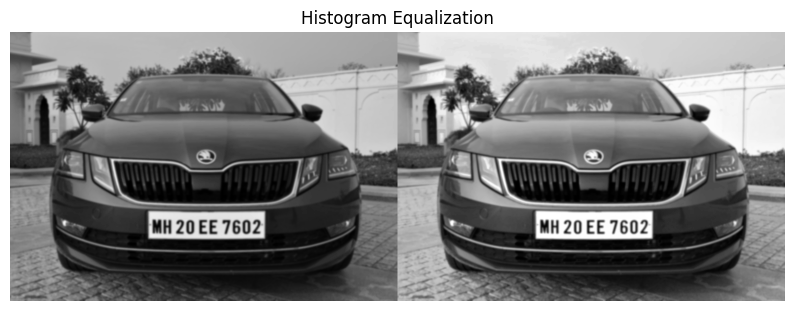

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "C:\\Users\\DELL\\Downloads\\d.jpg"  # Replace with the path to your image file
image = cv2.imread(image_path)  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)
# Apply histogram equalization
equ = cv2.equalizeHist(blurred_image)

# Concatenate the original image and the equalized image for comparison
res = np.hstack((blurred_image, equ))

# Display the original image and the equalized image
plt.figure(figsize=(10, 6))
plt.title('Histogram Equalization')
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()


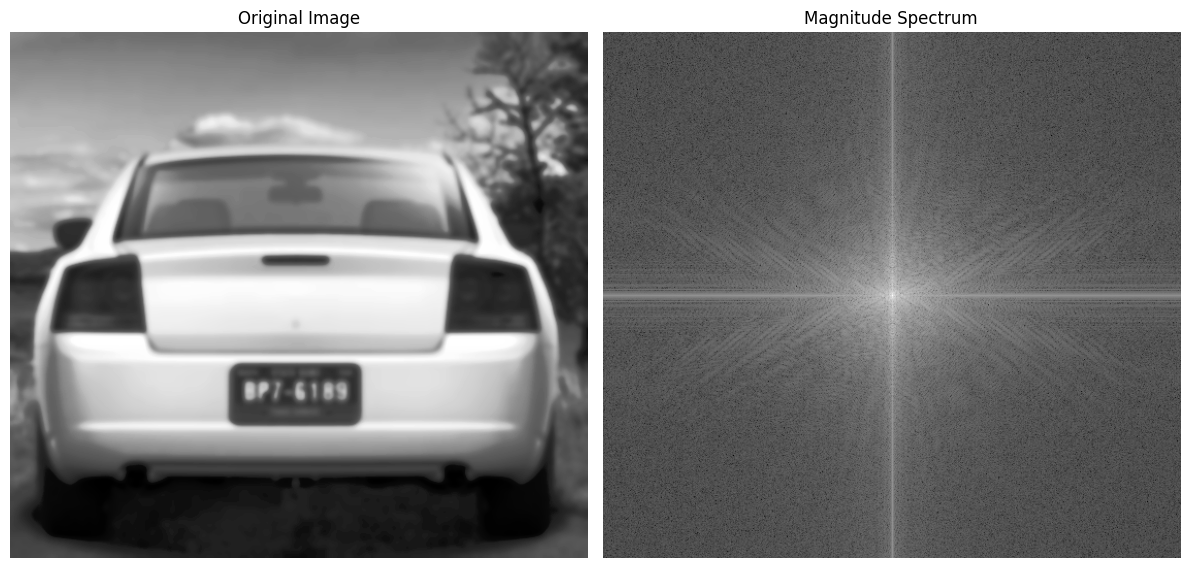

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (grayscale)
image_path = "C:\\Users\\DELL\\Downloads\\a.png"  # Replace with the path to your image file
image = cv2.imread(image_path)  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)
equ = cv2.equalizeHist(blurred_image)
# Perform Fourier Transform
f_transform = np.fft.fft2(equ)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))
# Display the original image and the magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(equ, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()


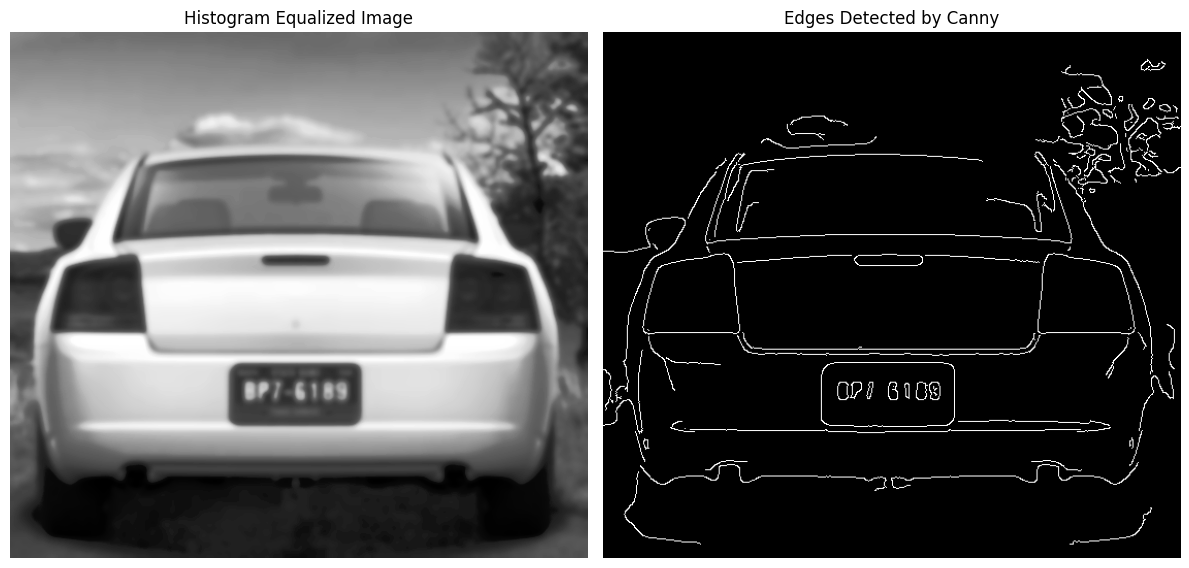

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image (grayscale)
image_path = "C:\\Users\\DELL\\Downloads\\a.png"  # Replace with the path to your image file
image = cv2.imread(image_path)  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)
equ = cv2.equalizeHist(blurred_image)
# Perform Canny edge detection
edges = cv2.Canny(equ, threshold1=30, threshold2=100)

# Display the original image and the edges detected by Canny
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(equ, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected by Canny')
plt.axis('off')

plt.tight_layout()
plt.show()


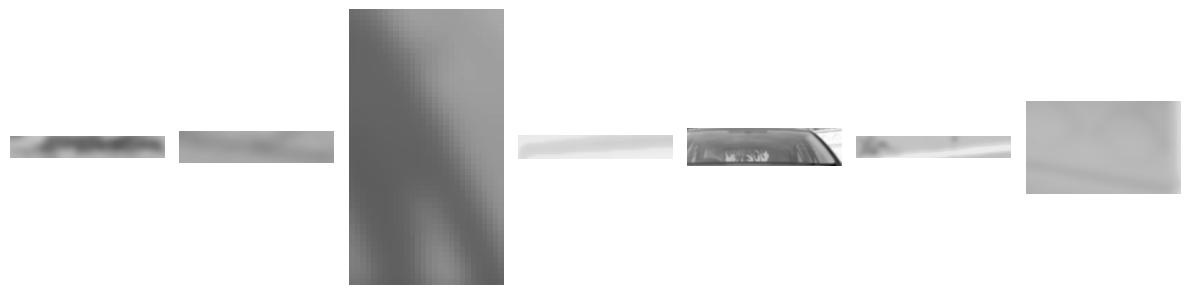

<Figure size 640x480 with 0 Axes>

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
image_path = "C:\\Users\\DELL\\Downloads\\d.jpg"  # Replace with the path to your image file
image = cv2.imread(image_path)  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)
equ = cv2.equalizeHist(blurred_image)
thresh = cv2.adaptiveThreshold(equ, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a list to store potential license plate regions
plate_regions = []

# Iterate through found contours
for contour in contours:
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    
    # Select contours with specific area and shape
    if len(approx) == 4 and area > 100:
        x, y, w, h = cv2.boundingRect(contour)
        plate_region = equ[y:y+h, x:x+w]
        plate_regions.append(plate_region)

# Display the original image with potential license plate regions highlighted
plt.figure(figsize=(12, 6))

for i, region in enumerate(plate_regions):
    plt.subplot(1, len(plate_regions), i + 1)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()
plt.savefig("number_plate.png")

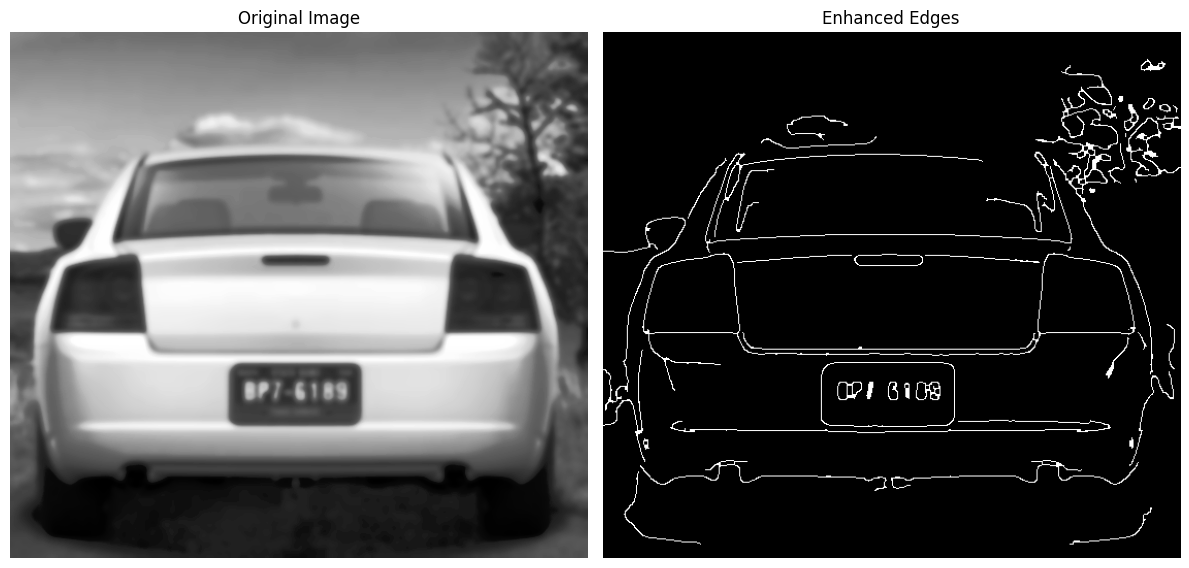

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image (potentially a cropped license plate region)
image_path = "C:\\Users\\DELL\\Downloads\\a.png"  # Replace with the path to your image file
image = cv2.imread(image_path)  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)
equ = cv2.equalizeHist(blurred_image)

# Perform Canny edge detection
edges = cv2.Canny(equ, threshold1=30, threshold2=100)

# Apply morphological operations (dilation and erosion) to enhance edges
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)
edges = cv2.erode(edges, kernel, iterations=1)

# Display the original image and the enhanced edges
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(equ, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Enhanced Edges')
plt.axis('off')

plt.tight_layout()
plt.show()


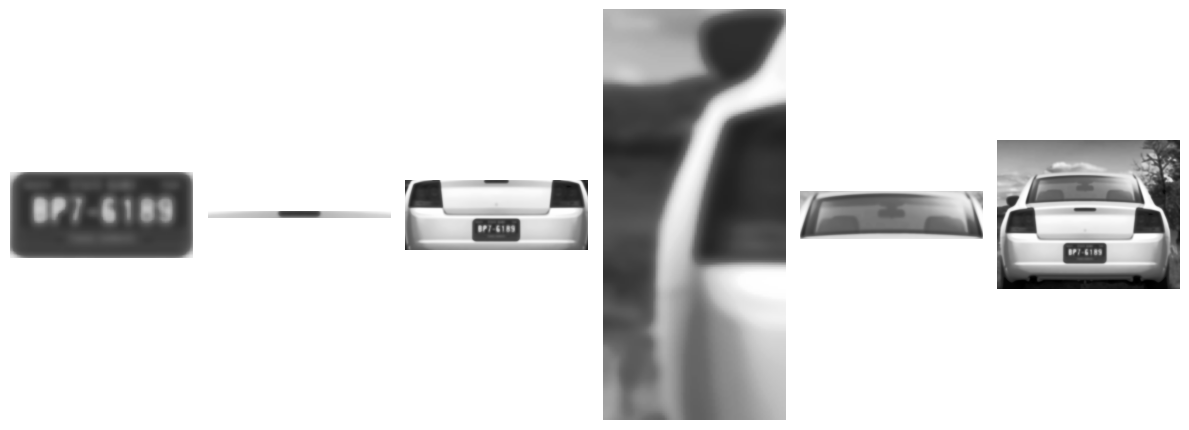

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image
image_path = "C:\\Users\\DELL\\Downloads\\a.png"  # Replace with the path to your image file
image = cv2.imread(image_path)  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)
equ = cv2.equalizeHist(blurred_image)

# Perform adaptive thresholding
thresh = cv2.adaptiveThreshold(equ, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Apply morphological operations to close gaps
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours in the closed image
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a list to store potential license plate regions
plate_regions = []

# Iterate through found contours
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:  # Adjust area threshold as needed
        x, y, w, h = cv2.boundingRect(contour)
        plate_region = equ[y:y+h, x:x+w]
        plate_regions.append(plate_region)

# Display the original image with potential license plate regions highlighted
plt.figure(figsize=(12, 6))

for i, region in enumerate(plate_regions):
    plt.subplot(1, len(plate_regions), i + 1)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()


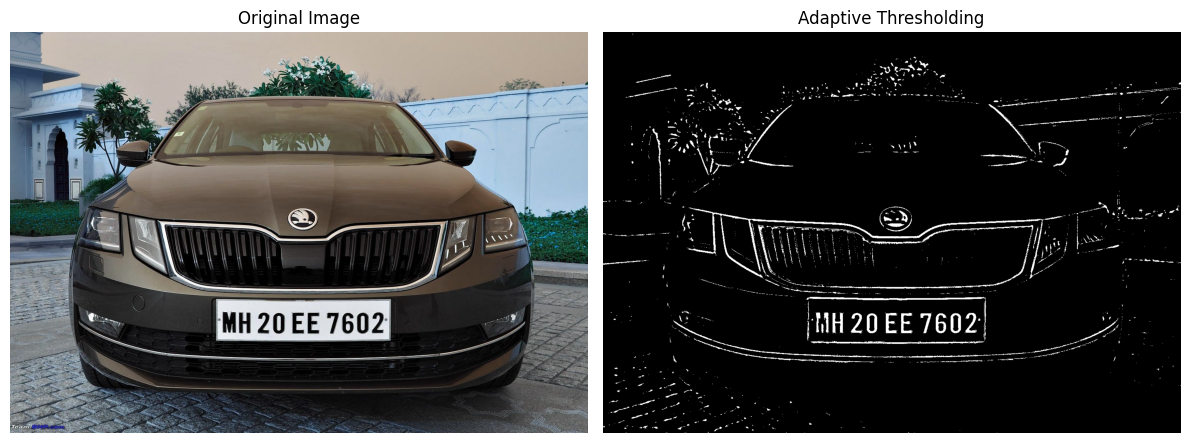

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image (grayscale)
image_path = "C:\\Users\\DELL\\Downloads\\d.jpg"  # Replace with the path to your image file
image = cv2.imread(image_path)  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)
equ = cv2.equalizeHist(blurred_image)

# Perform adaptive thresholding
thresh = cv2.adaptiveThreshold(equ, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 5)

# Display the original image and the thresholded image
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


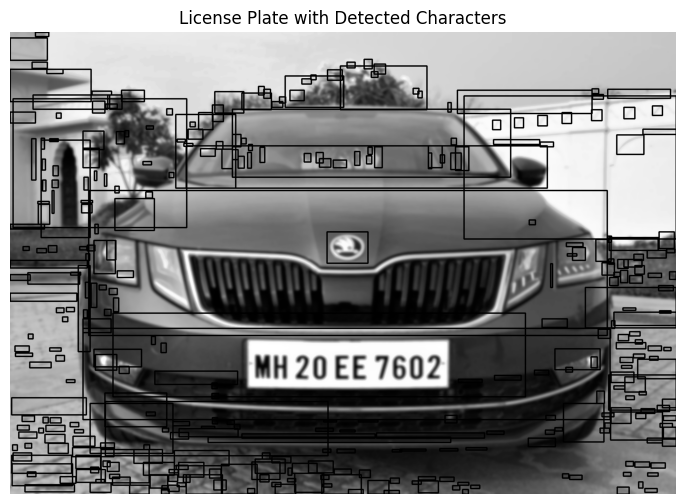

C:\Users\DELL\AppData\Local\Temp\ipykernel_1732\2777121511.py:54: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image (grayscale)
image_path = "C:\\Users\\DELL\\Downloads\\d.jpg"  # Replace with the path to your image file
image = cv2.imread(image_path)  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)
equ = cv2.equalizeHist(blurred_image)
thresh = cv2.adaptiveThreshold(equ, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a list to store individual character images
character_images = []

# Iterate through found contours
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Filter out small contours (noise)
    if w * h < 100:
        continue
    
    # Extract the region of interest (character)
    character = equ[y:y+h, x:x+w]
    
    # Resize the character image to a fixed size (if needed)
    character_resized = cv2.resize(character, (50, 50))
    
    # Store the character image in the list
    character_images.append(character_resized)
    
    # Draw bounding box around the character (optional)
    cv2.rectangle(equ, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the license plate image with detected characters
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(equ, cv2.COLOR_BGR2RGB))
plt.title('License Plate with Detected Characters')
plt.axis('off')
plt.show()

# Display each segmented character image
plt.figure(figsize=(15, 3))
for i, char_img in enumerate(character_images):
    plt.subplot(1, len(character_images), i + 1)
    plt.imshow(char_img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


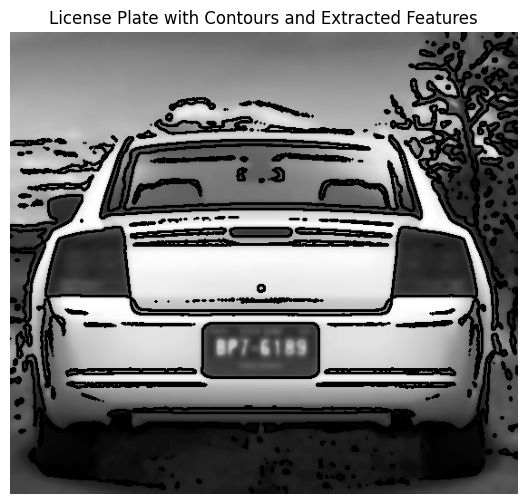

Sizes (Areas): [1.5, 0.0, 1.5, 0.0, 0.0, 4.5, 0.0, 0.0, 0.0, 1.0, 16.0, 39.5, 7.5, 0.0, 0.0, 0.0, 48.0, 0.0, 31.0, 8.5, 0.0, 0.0, 17.0, 0.0, 0.0, 0.5, 1.0, 0.0, 2.5, 0.0, 27.5, 0.5, 3.5, 4.5, 11.0, 0.0, 0.0, 1.5, 6.0, 0.0, 0.0, 2.0, 4.0, 0.5, 0.0, 5.0, 9.5, 237.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 0.0, 0.0, 53.0, 7.0, 273.0, 0.0, 19.0, 0.0, 0.0, 4.5, 3.0, 0.0, 7.0, 0.0, 12.0, 7.5, 2.5, 2.5, 8.5, 4.0, 24.0, 0.0, 1.0, 9.0, 0.0, 1252.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 29.0, 2.5, 0.0, 1.5, 2.5, 8.0, 21.0, 2.0, 0.0, 0.0, 0.0, 451.5, 3.0, 446.5, 35.0, 37.5, 570.0, 574.0, 16.0, 4.5, 0.0, 9.0, 14.0, 0.0, 0.0, 1699.5, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1879.0, 0.0, 128.0, 74.5, 0.0, 0.0, 0.0, 101.5, 0.0, 48.0, 7606.5, 71.5, 55.5, 133.5, 40.5, 0.0, 0.0, 0.0, 122.5, 14.0, 29.5, 0.0, 0.0, 16.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.5, 13.0, 0.0, 0.5, 0.5, 0.5, 0.0, 628.0, 518.0, 2.5, 4.0, 43.5, 0.0, 2.5, 15.0, 0.0, 28.0, 40.5, 5.5, 8.5, 2.5, 0.0, 2.0, 0.0, 0.0, 0.0, 0.

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load an image (grayscale)
image_path = "C:\\Users\\DELL\\Downloads\\a.png"  # Replace with the path to your image file
image = cv2.imread(image_path)  # Replace with your image path
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)
equ = cv2.equalizeHist(blurred_image)
thresh = cv2.adaptiveThreshold(equ, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize lists to store features
sizes = []
shapes = []
orientations = []

# Iterate through found contours
for contour in contours:
    # Calculate moments to extract features
    moments = cv2.moments(contour)
    
    # Calculate area (size)
    area = moments['m00']
    sizes.append(area)
    
    # Calculate aspect ratio (shape)
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    shapes.append(aspect_ratio)
    
    # Calculate orientation (angle)
    # orientation = cv2.fitEllipseNoDirect(contour)[-1]
    # orientations.append(orientation)

    # Optionally, draw bounding box around the character
    cv2.drawContours(equ, [contour], -1, (0, 255, 0), 2)

# Display the license plate image with contours and extracted features
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(equ, cv2.COLOR_BGR2RGB))
plt.title('License Plate with Contours and Extracted Features')
plt.axis('off')
plt.show()

# Display extracted features
print("Sizes (Areas):", sizes)
print("Shapes (Aspect Ratios):", shapes)



In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load a sample license plate character template
template_path = "C:\\Users\\DELL\\Downloads\\"  # Replace with your template path
template_0 = cv2.imread(template_path + "c.png", cv2.IMREAD_GRAYSCALE)
template_1 = cv2.imread(template_path + "b.png", cv2.IMREAD_GRAYSCALE)
# Load the license plate image
from PIL import Image
from PIL import ImageShow  # For some environments, you may need to import ImageShow explicitly

# Load an image from file
image_path = "C:\\Users\\DELL\\Downloads\\a.png" # Replace with the path to your image file
img = Image.open(image_path)  # Replace with your image path
ImageShow.show(img)

True

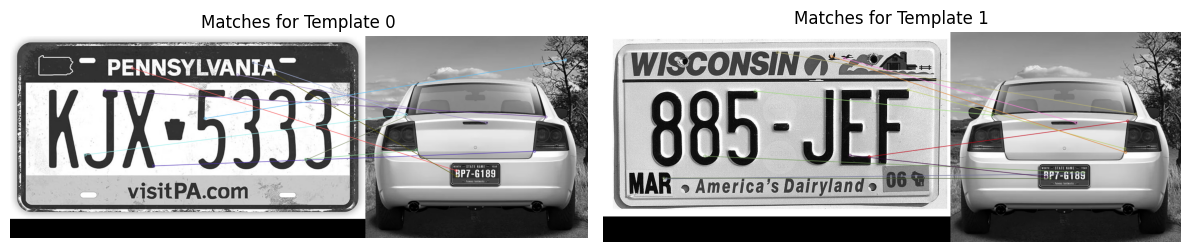

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to extract ORB features and descriptors from an image
def extract_features(image):
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(image, None)
    return keypoints, descriptors

# Load known character templates (examples)
template_path = "C:\\Users\\DELL\\Downloads\\"  # Replace with your template path
template_0 = cv2.imread(template_path + "b.png", cv2.IMREAD_GRAYSCALE)
template_1 = cv2.imread(template_path + "c.png", cv2.IMREAD_GRAYSCALE)
# Load the license plate image
image_path = "C:\\Users\\DELL\\Downloads\\a.png"  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Extract features (keypoints and descriptors) from the templates
keypoints_0, descriptors_0 = extract_features(template_0)
keypoints_1, descriptors_1 = extract_features(template_1)

# Extract features (keypoints and descriptors) from the license plate image
keypoints_img, descriptors_img = extract_features(img)

# Initialize a Brute-Force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors of template_0 with license plate image descriptors
matches_0 = bf.match(descriptors_0, descriptors_img)
matches_0 = sorted(matches_0, key=lambda x: x.distance)  # Sort matches by distance

# Match descriptors of template_1 with license plate image descriptors
matches_1 = bf.match(descriptors_1, descriptors_img)
matches_1 = sorted(matches_1, key=lambda x: x.distance)  # Sort matches by distance

# Draw matches for template_0
img_matches_0 = cv2.drawMatches(template_0, keypoints_0, img, keypoints_img, matches_0[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Draw matches for template_1
img_matches_1 = cv2.drawMatches(template_1, keypoints_1, img, keypoints_img, matches_1[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_matches_0, cv2.COLOR_BGR2RGB))
plt.title('Matches for Template 0')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_matches_1, cv2.COLOR_BGR2RGB))
plt.title('Matches for Template 1')
plt.axis('off')

plt.tight_layout()
plt.show()


In [25]:
import re

# Function to verify license plate format
def verify_license_plate_format(plate_text):
    # Define a regular expression for the license plate format (e.g., AAA-1234)
    pattern = "KJX-5333"
    
    # Check if the plate text matches the format
    if re.match(pattern, plate_text):
        return True
    else:
        return False

# Example usage:
detected_plate_text = "BP7-G189"  # Replace with the detected plate text

# Verify the detected plate text against the predefined format
is_valid_format = verify_license_plate_format(detected_plate_text)

if is_valid_format:
    print(f"The detected plate text '{detected_plate_text}' matches the predefined format.")
else:
    print(f"The detected plate text '{detected_plate_text}' does not match the predefined format.")


The detected plate text 'BP7-G189' does not match the predefined format.
